In [1]:
import os
import sys

lib_path = os.path.abspath("").replace("notebooks", "src")
sys.path.append(lib_path)

import torch
import matplotlib.pyplot as plt
from data.dataloader import build_train_test_dataset
from tqdm.auto import tqdm
import numpy as np
from configs.base import Config

/home/namphuongtran9196/.miniconda3/envs/SER/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
INT2LABEL = {
    0: "Anger",
    1: "Happiness",
    2: "Sadness",
    3: "Neutral",
}

In [7]:
cfg = Config()
# Dataset
cfg.batch_size = 1
cfg.data_name = "IEMOCAP"  # [IEMOCAP, ESD, MELD]
cfg.data_root = "data/IEMOCAP_preprocessed"  # folder contains train.pkl and test.pkl
cfg.data_valid = "val.pkl"  
encoder_model = None
train_ds, val_ds = build_train_test_dataset(cfg, encoder_model)
cfg.data_valid = "test.pkl"  
_, test_ds = build_train_test_dataset(cfg, encoder_model)

In [8]:
iemocap_data = []
for _, _, label in train_ds:
    iemocap_data.append(label.detach().cpu().numpy()[0])
for _, _, label in val_ds:
    iemocap_data.append(label.detach().cpu().numpy()[0])
for _, _, label in test_ds:
    iemocap_data.append(label.detach().cpu().numpy()[0])

In [13]:
pie_value = {}
for k, v in INT2LABEL.items():
    num_samples = sum([1 if x == k else 0 for x in iemocap_data ])
    print(v, num_samples)
    pie_value[v] = num_samples

Anger 1103
Happiness 1636
Sadness 1084
Neutral 1708


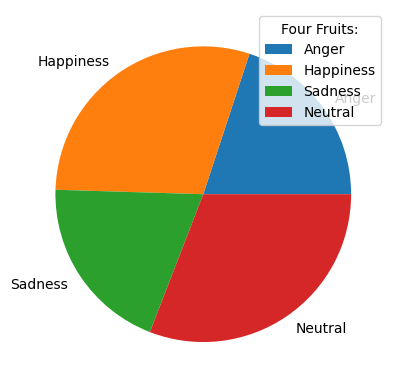

In [14]:
y = np.array(list(pie_value.values()))
mylabels = list(pie_value.keys())

plt.pie(y, labels = mylabels , shadow = True)
plt.legend(title = "Four Fruits:")
plt.show() 